# CORDIC core

This notebook visualizes various results obtained from the CORDIC core in [```rtl/cordic.v```](../rtl/cordic.v) using the [```tb/core_test.sv```](../tb/core_test.sv) testbench

---

In [1]:
# Import builtin libraries
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
# Import custom utility python libraries from utils folder
sys.path.append("../utils/")
from logfile import *

---

# Overflow analysis

Look at the following plots to analyze coverage and overflow cases for rotation mode. 

The first set of plots show the case for no limits on the inputs.

Rotation mode


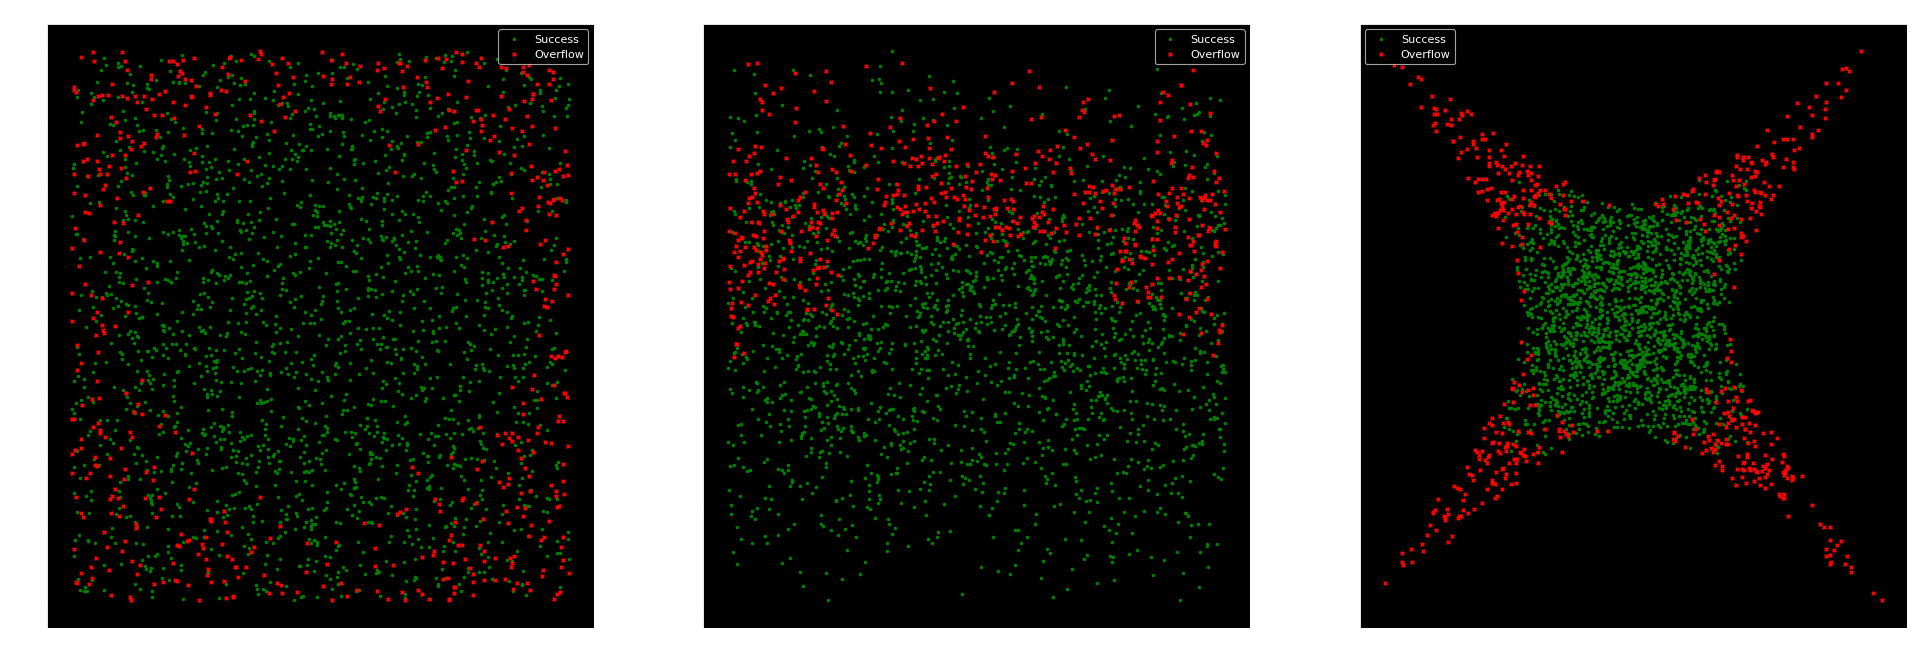

Vectoring mode


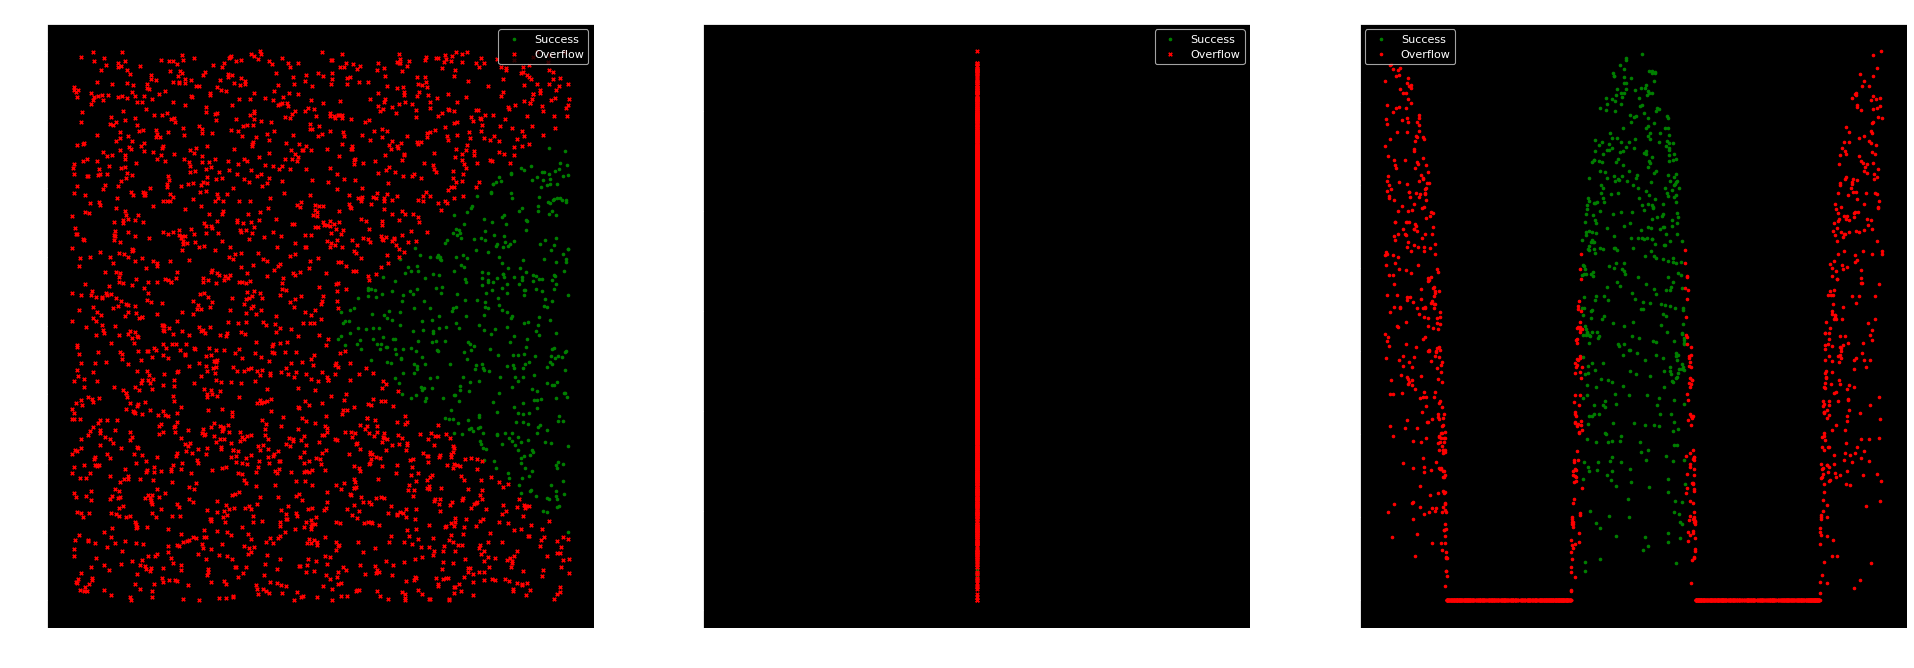

In [3]:
print("Rotation mode")
vis_rot_inputs_file("data/hyp_rot/30_nnn_x2500.txt")

print("Vectoring mode")
vis_vect_inputs_file("data/hyp_vect/30_nnn_x2500.txt")

The following set imposes certain limits that seek to reduce or eliminate overflow and error. These restrictions can be seen from the above figures which show clear patterns that lead to overflow. These limits are :

### Rotation mode

- Input magnitude must be less than ```0.6072529350092496```
- Input angle must be between ```+/-100 deg``` (for reducing error)

### Vectoring mode

- Input magnitude must be less than ```0.6072529350092496```
- Expected angle must be between ```+/-100 deg``` (for reducing error)

The angle restriction can be overcome by pre-rotating the inputs by 180 degrees or 90 degrees to take the inputs to the 1st or 4th quadrants

Rotation mode


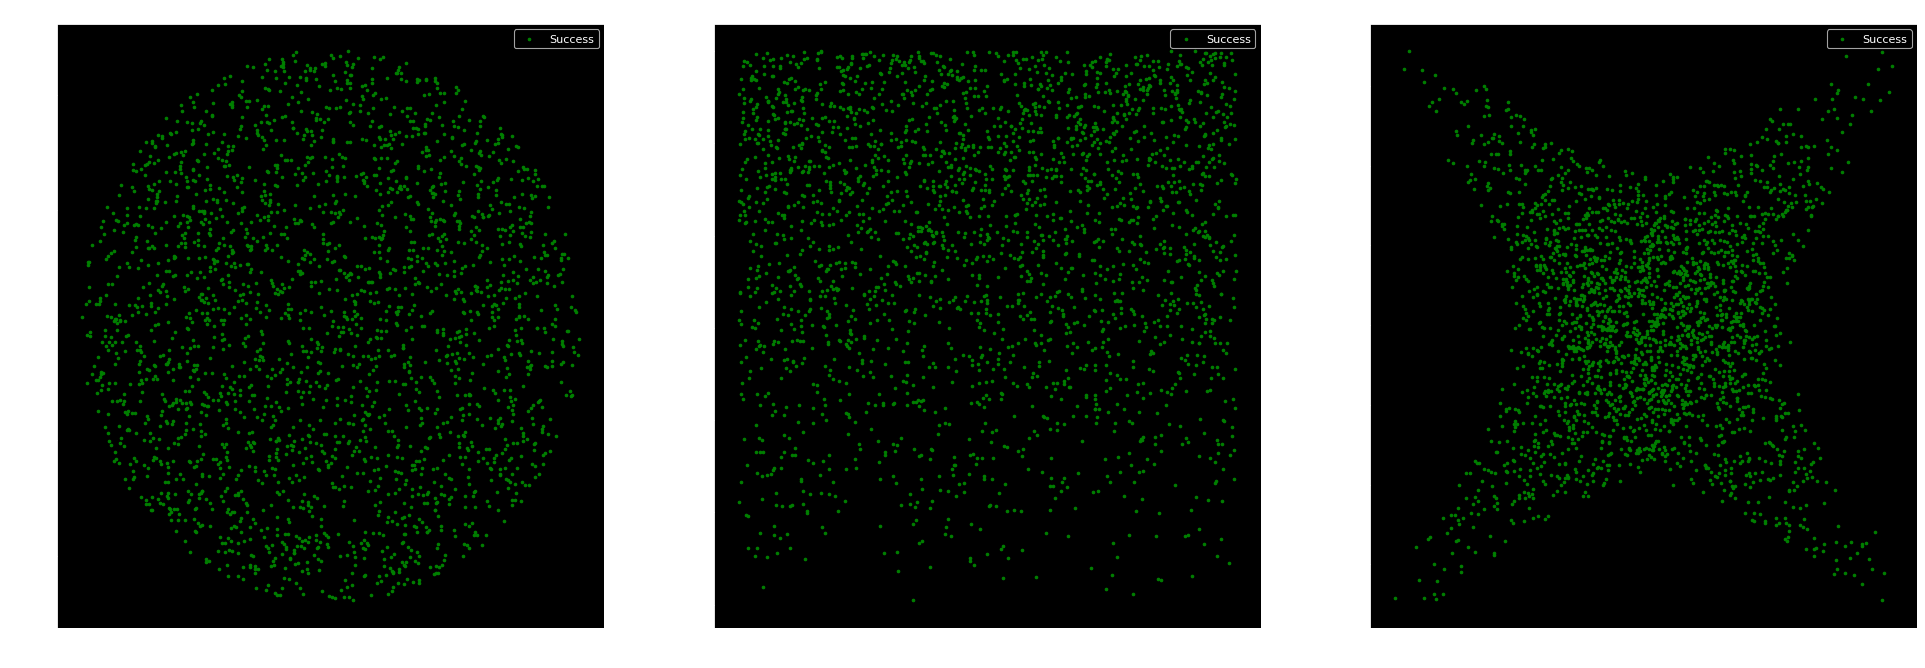

Vectoring mode


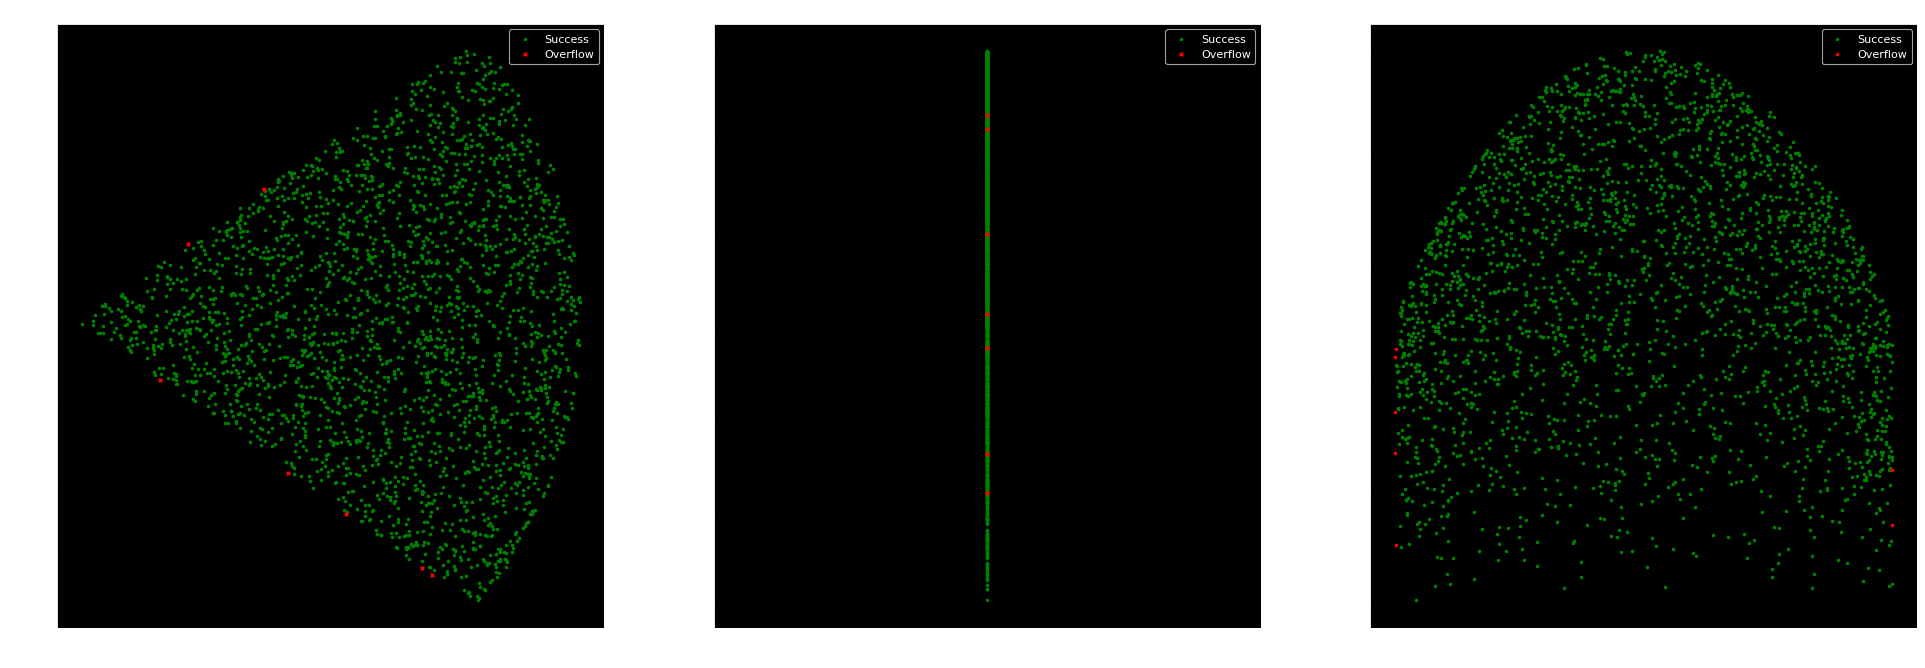

In [4]:
print("Rotation mode")
vis_rot_inputs_file("data/hyp_rot/30_nny_x2500.txt")

print("Vectoring mode")
vis_vect_inputs_file("data/hyp_vect/30_nny_x2500.txt")

---

## Rotation mode error analysis

The following plots show error of actual CORDIC output from the expected output values for 15 iterations. These do not include inputs that overflowed

Circular rotation


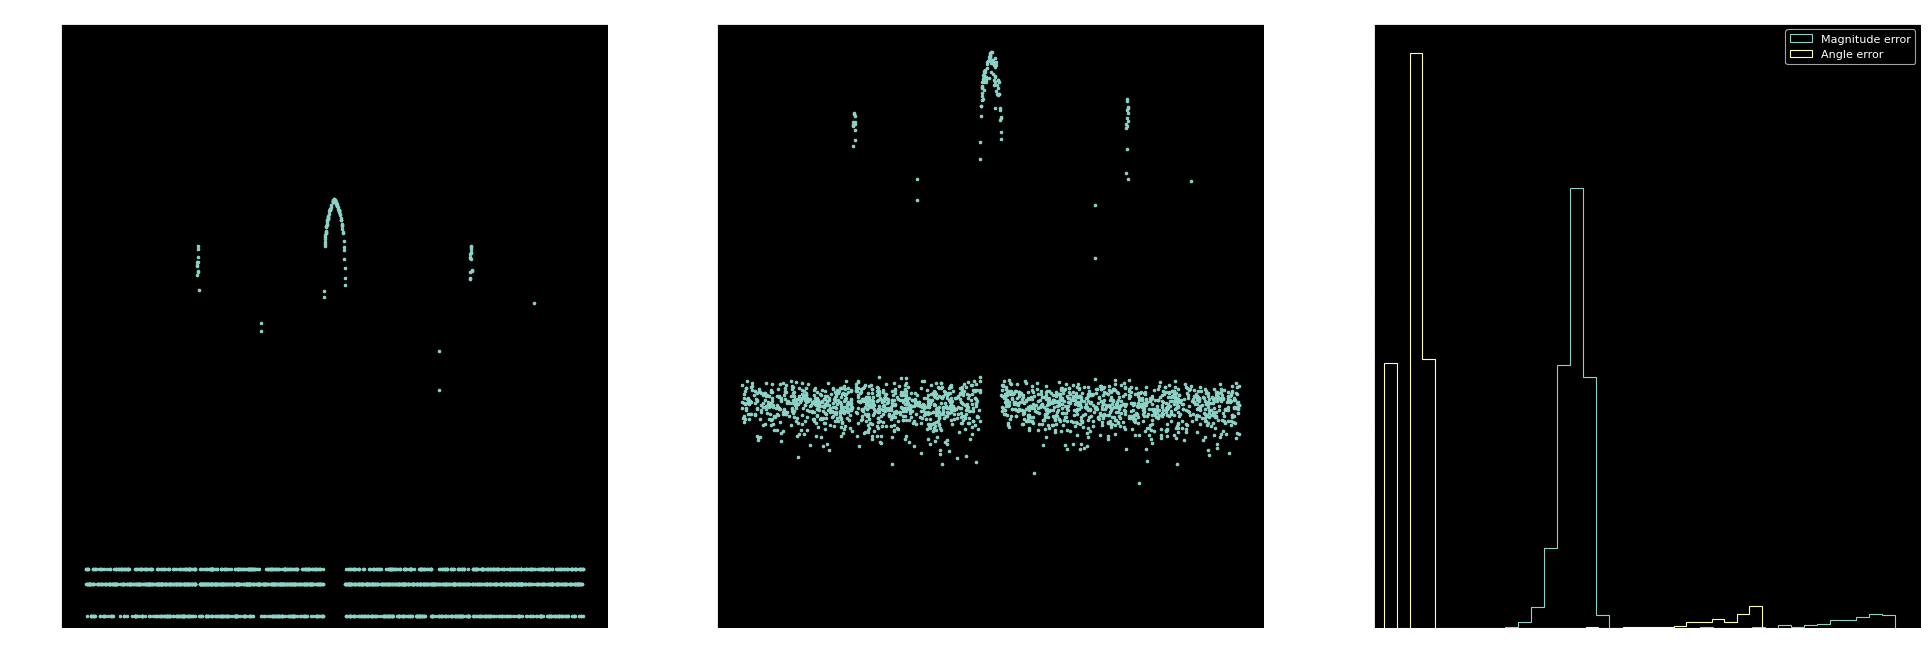

Circular vectoring


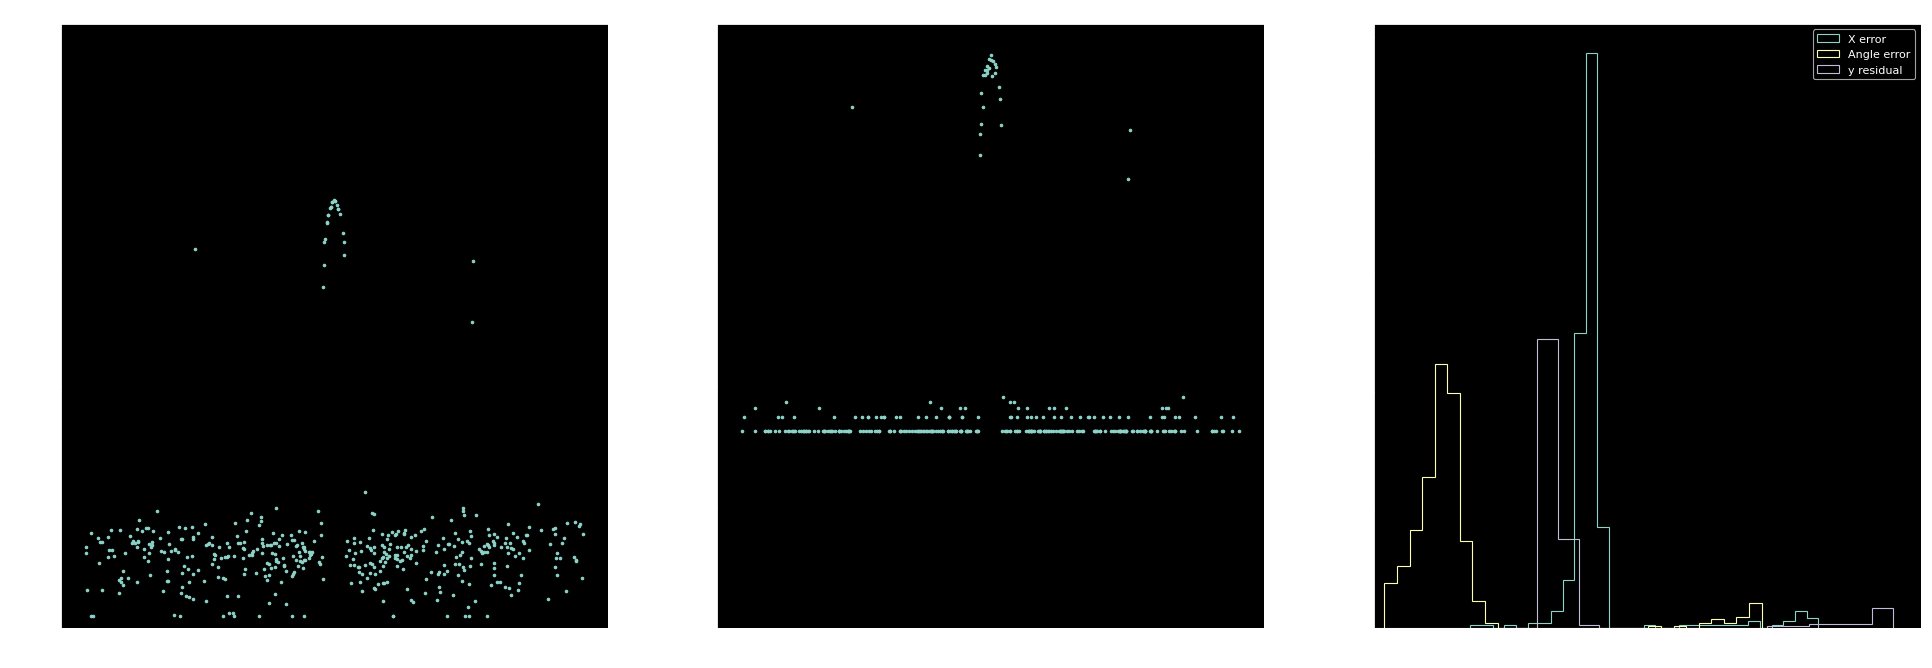

In [5]:
# View inputs for constrained inputs
print("Hyperbolic rotation")
vis_rot_error_file("data/hyp_rot/30_nnn_x2500.txt")

print("Hyperbolic vectoring")
vis_vect_error_file("data/hyp_vect/30_nnn_x2500.txt")

We can see that error is high for input angle > about 100 degrees in rotation and expected angle > 100 degrees in vectoring. This is because the tan inverse angles used in CORDIC converge to about 100 degrees. So, we limit inputs to this range

Hyperbolic rotation


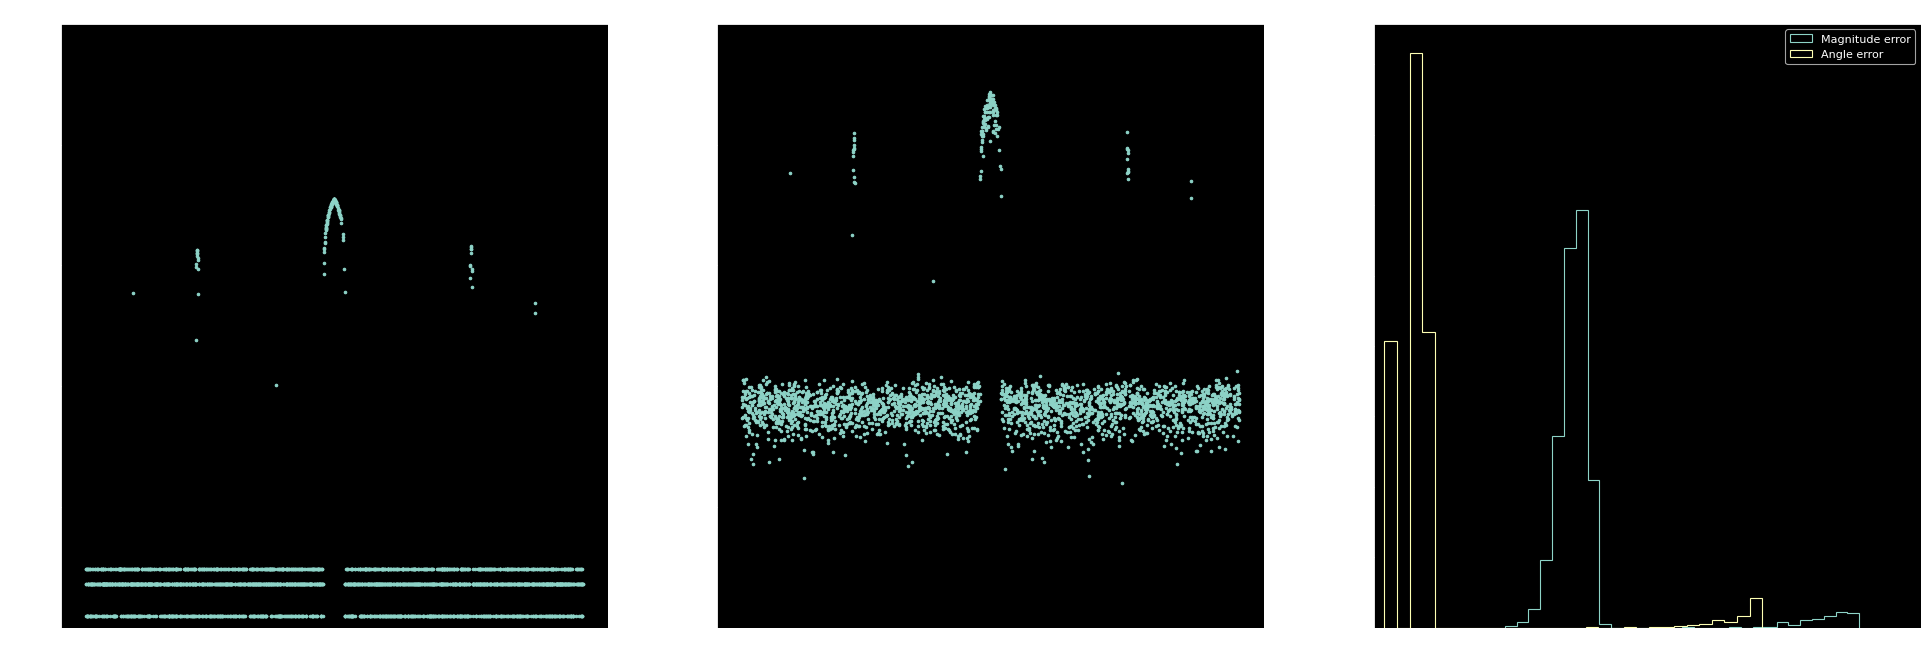

Hyperbolic vectoring


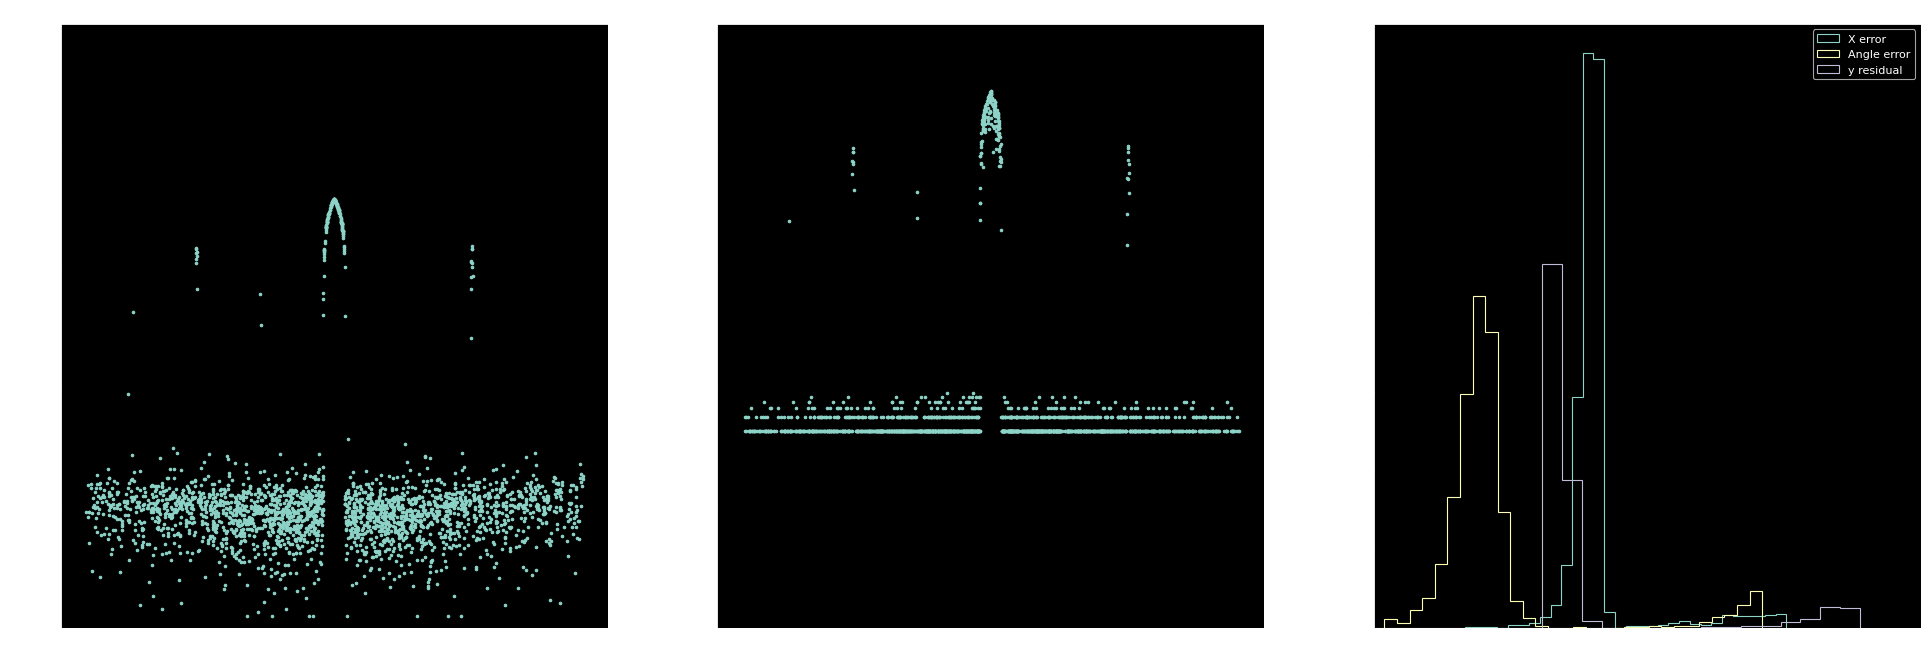

In [7]:
# View inputs for constrained inputs
print("Hyperbolic rotation")
vis_rot_error_file("data/hyp_rot/30_nny_x2500.txt")

print("Hyperbolic vectoring")
vis_vect_error_file("data/hyp_vect/30_nny_x2500.txt")

---

## Rotation summary

Rotation error performance can be seen using these box-and-whisker plots. The whiskers extend from the lowest 5%ile to the upper 5%ile of data. The boxes extend from 25%ile to 75%ile and the median is shown inside the boxes. The lowest 5%ile and upper 5%ile of data are shown as points

Box and whiskers plot for rotation error


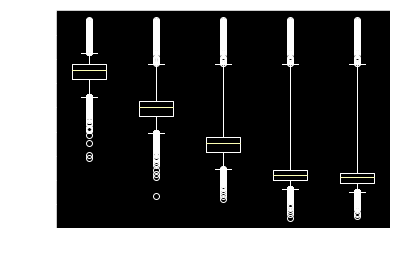

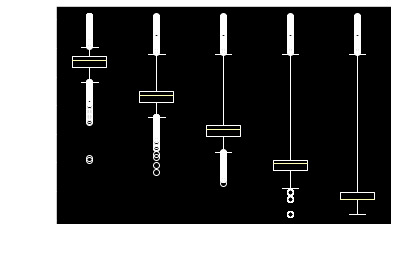

In [8]:
mag_err = []
ang_err = []
iter_ls = []

for i in (10, 15, 20, 25, 30):
    f1 = log_file("data/hyp_rot/%d_nny_x2500.txt"%(i))
    f1.parse()
    mag_err.append(np.log10(np.linalg.norm(f1.err_good[:, 0:2], axis=1)) * 20)
    ang_err.append(20 * np.log10(np.maximum(1e-10, np.abs(f1.err_good[:, 2])) / 180))
    iter_ls.append(i)        
        
print("Box and whiskers plot for rotation error")

plt.boxplot(mag_err, labels=iter_ls, whis=[5, 95])
plt.xlabel("Number of iterations")
plt.ylabel("Magnitude error (dB)")
plt.show()

plt.boxplot(ang_err, labels=iter_ls, whis=[5, 95])
plt.xlabel("Number of iterations")
plt.ylabel("Angle residual (dB)")
plt.show()

Box and whiskers plot for vectoring error


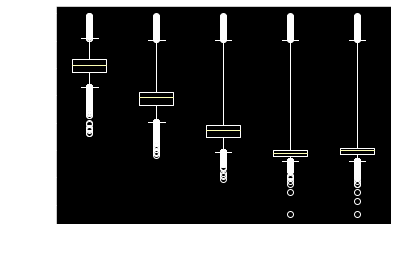

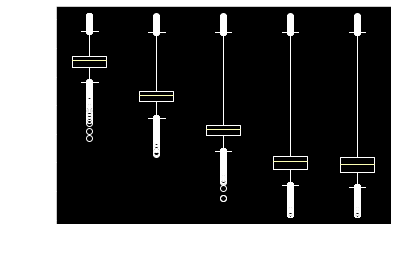

In [12]:
mag_err = []
ang_err = []
iter_ls = []

for i in (10, 15, 20, 25, 30):
    f1 = log_file("data/hyp_vect/%d_nny_x2500.txt"%(i))
    mag_err.append(np.log10(np.linalg.norm(f1.err_good[:, 0:2], axis=1)) * 20)
    ang_err.append(20 * np.log10(np.maximum(1e-10, np.abs(f1.err_good[:, 2])) / 180))
    iter_ls.append(i)        
        
print("Box and whiskers plot for vectoring error")

plt.boxplot(mag_err, labels=iter_ls, whis=[5, 95])
plt.xlabel("Number of iterations")
plt.ylabel("Magnitude error (dB)")
plt.show()

plt.boxplot(ang_err, labels=iter_ls, whis=[5, 95])
plt.xlabel("Number of iterations")
plt.ylabel("Angle residual (dB)")
plt.show()

---

## Per-iteration error

10 CORDIC iterations


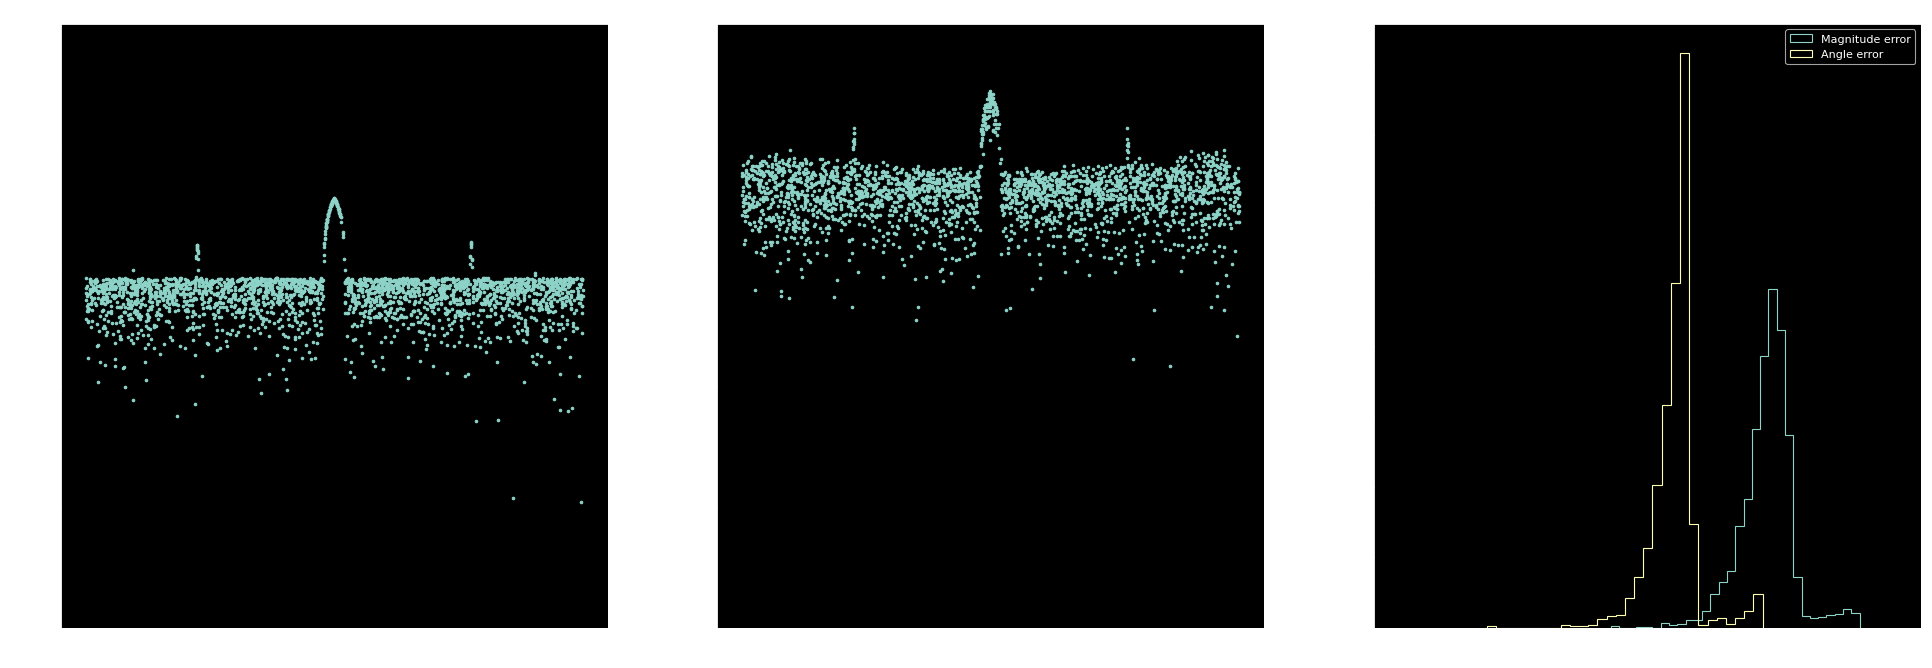

15 CORDIC iterations


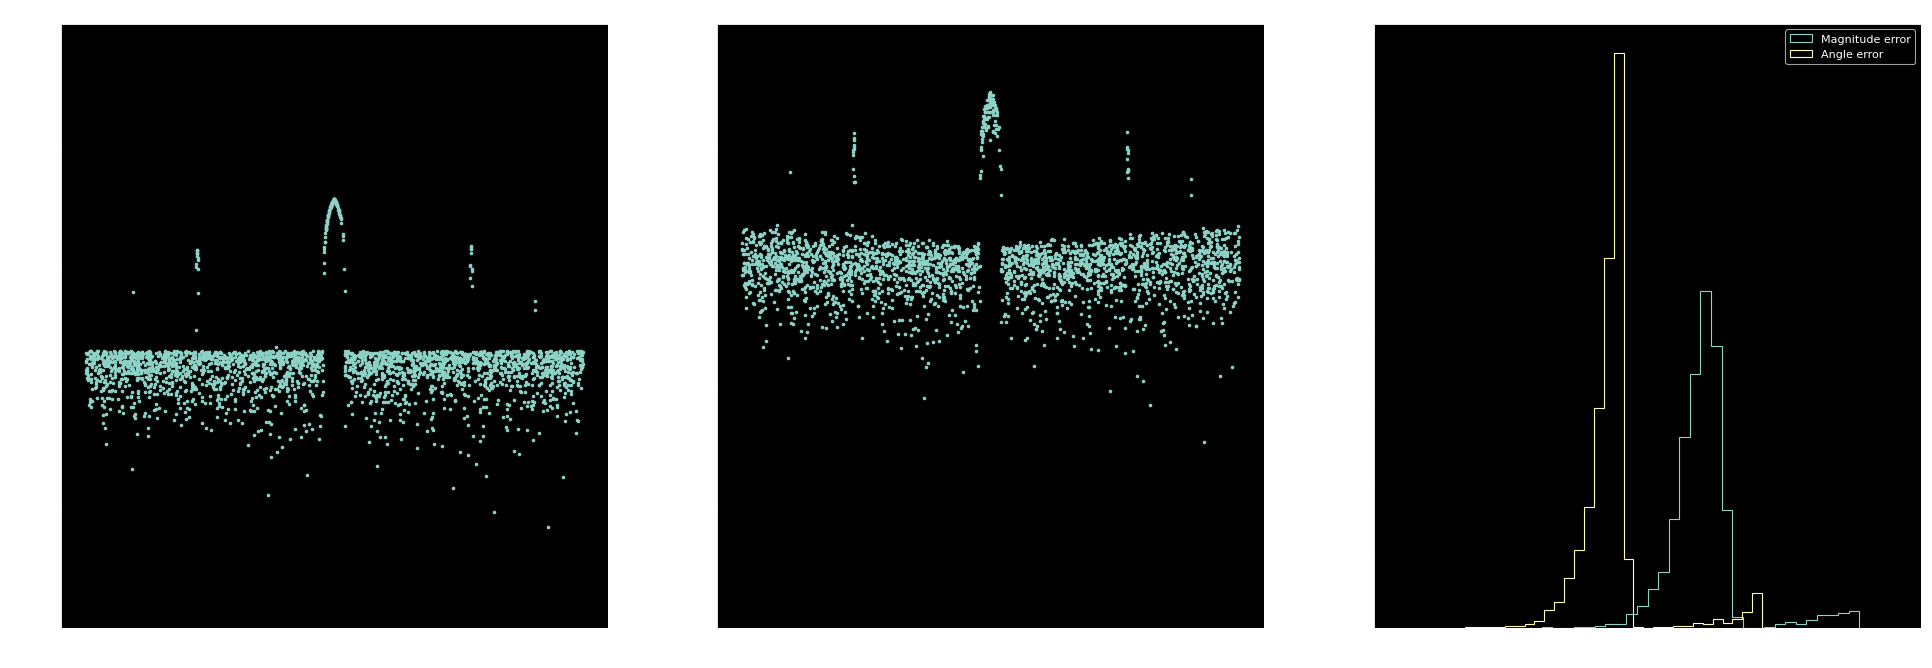

20 CORDIC iterations


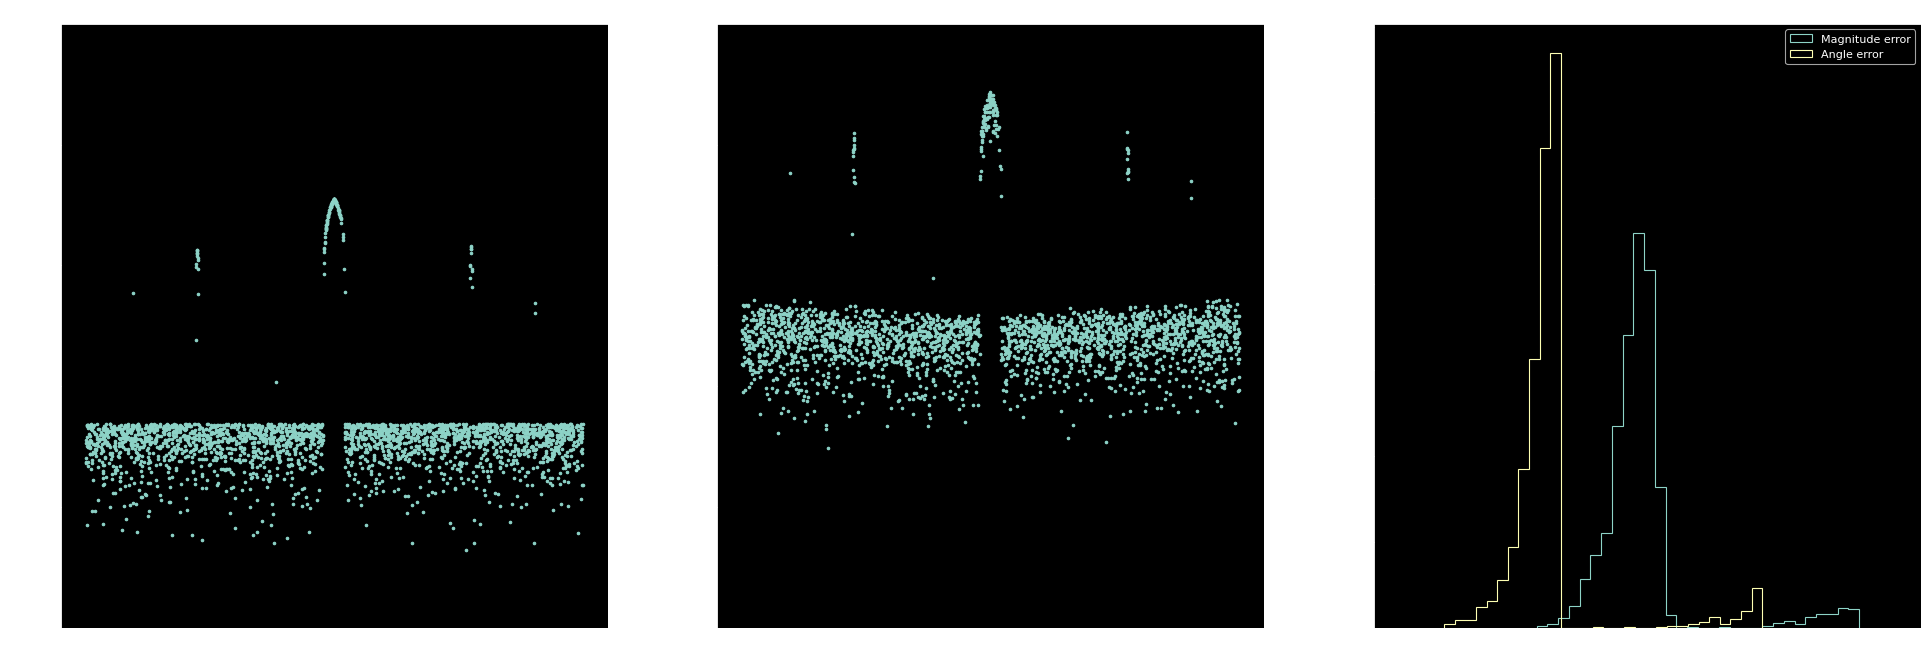

25 CORDIC iterations


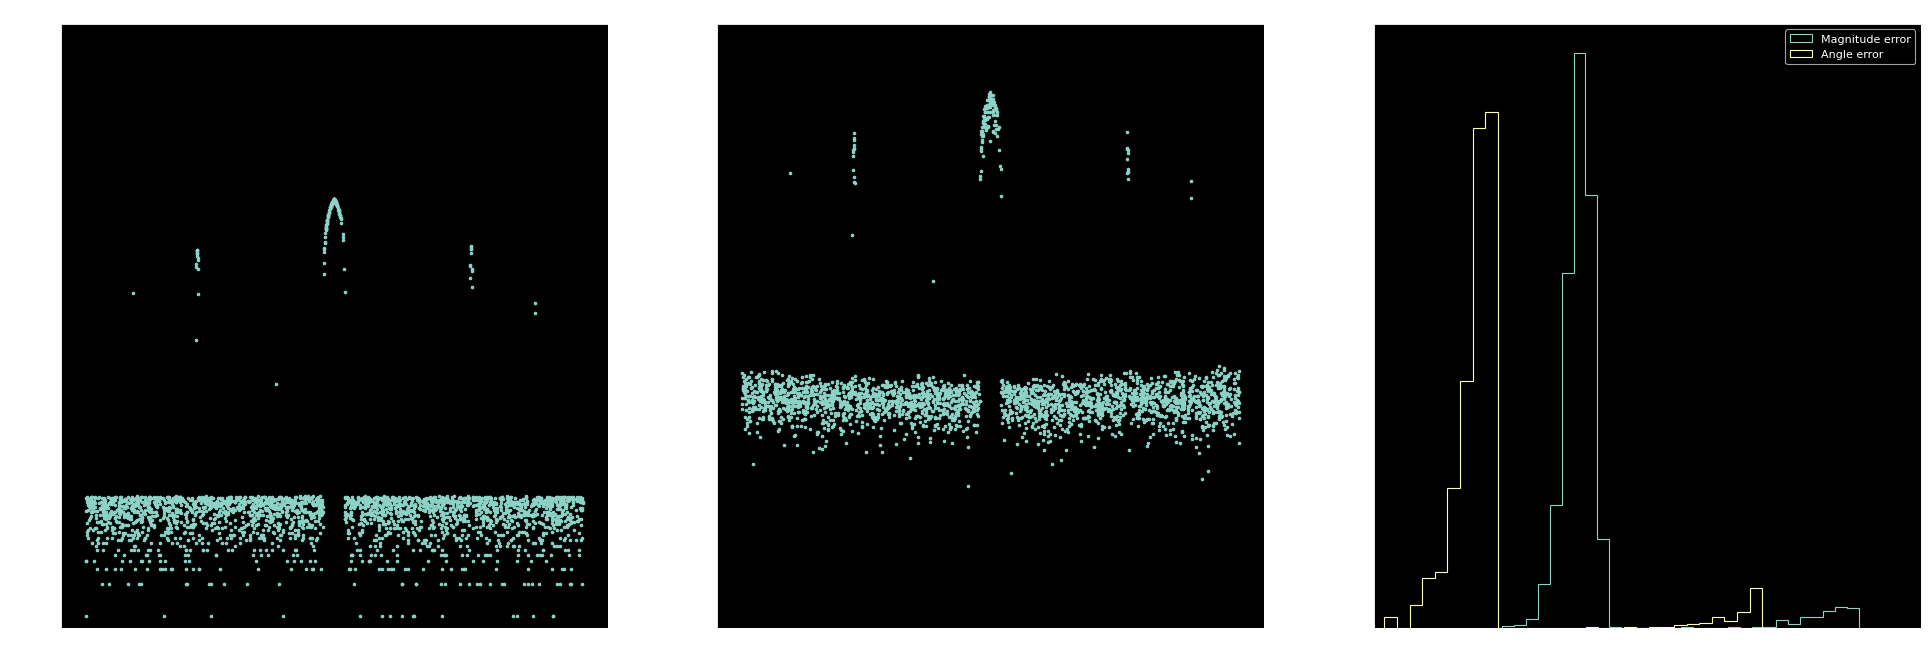

30 CORDIC iterations


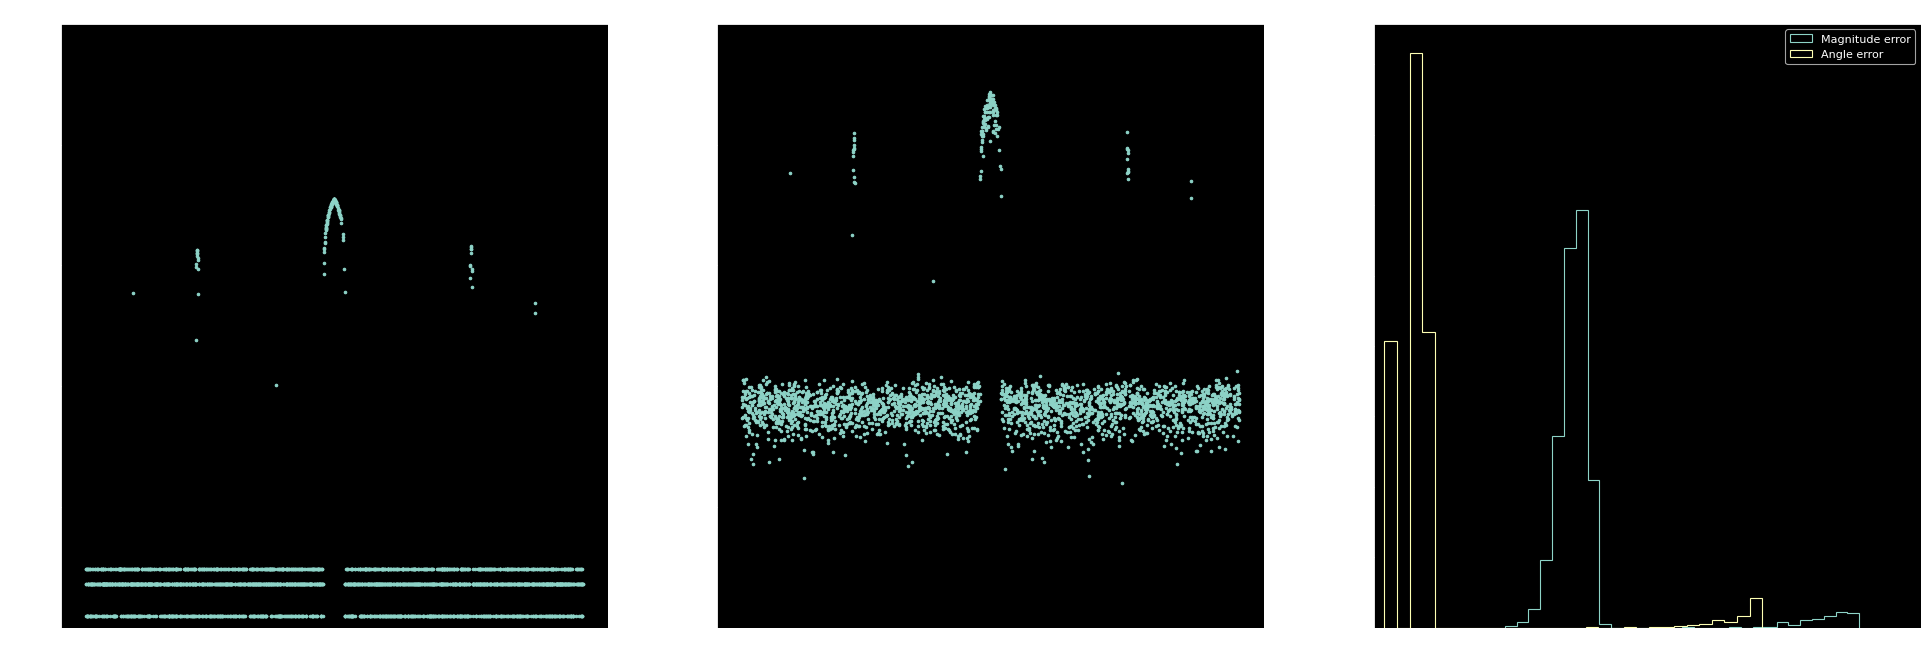

In [9]:
# Error for circular mode with different number of iterations
for i in (10, 15, 20, 25, 30):
    print("%d CORDIC iterations"%(i))
    vis_rot_error_file("data/hyp_rot/%d_nny_x2500.txt"%(i))

10 CORDIC iterations


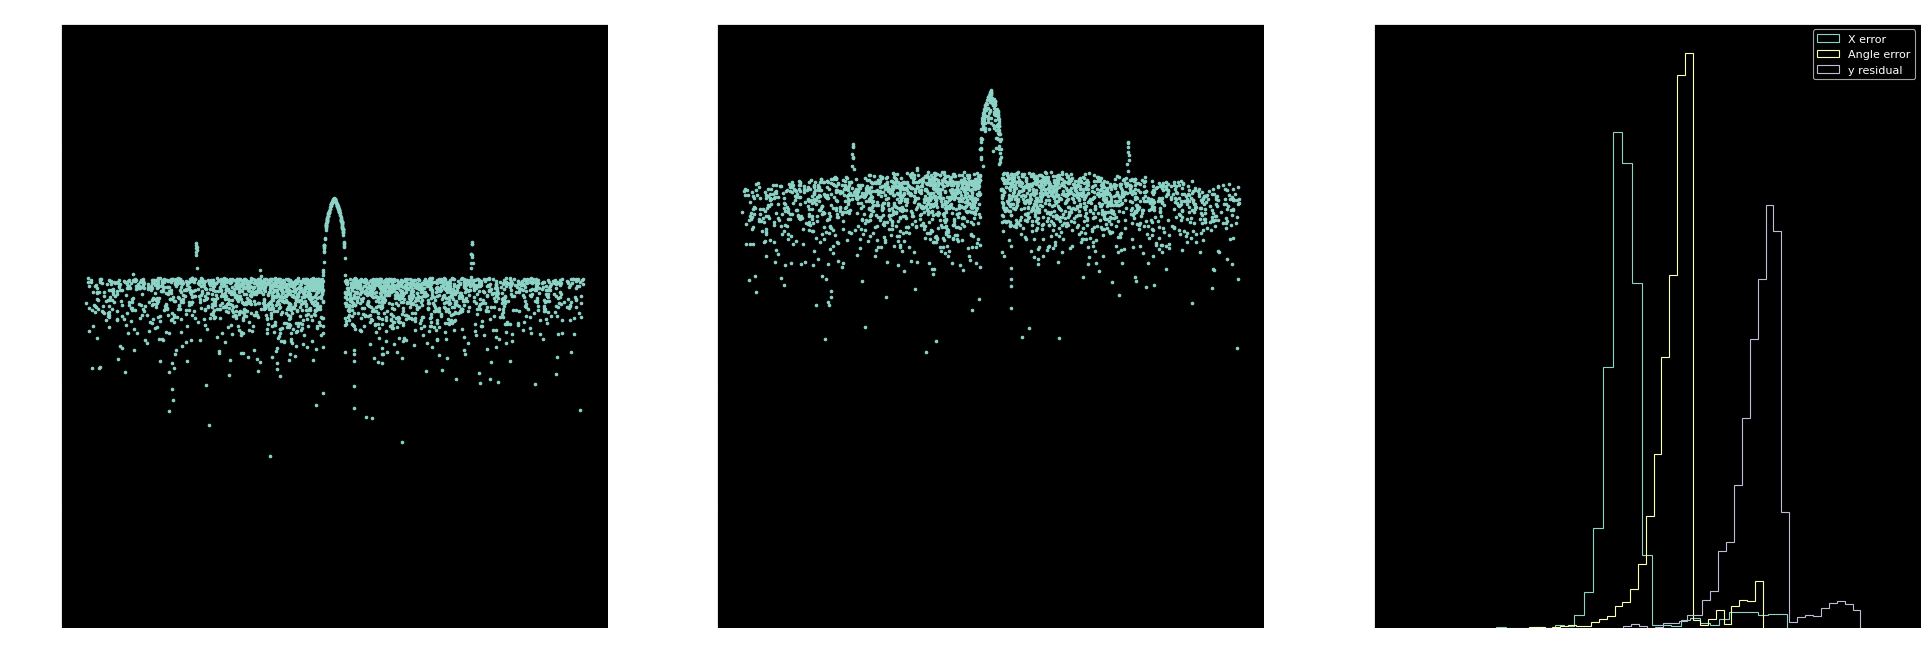

15 CORDIC iterations


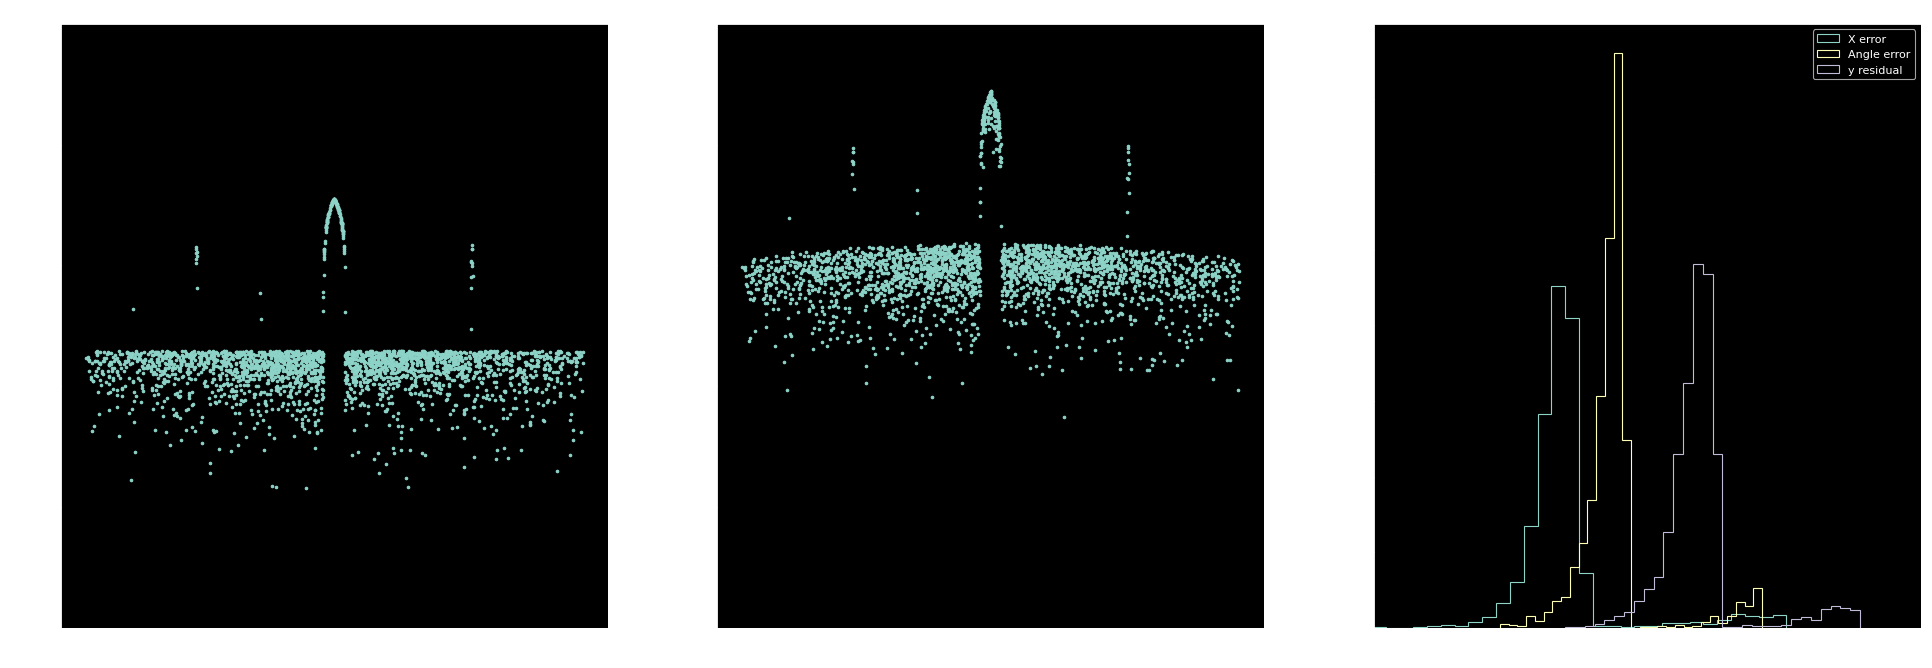

20 CORDIC iterations


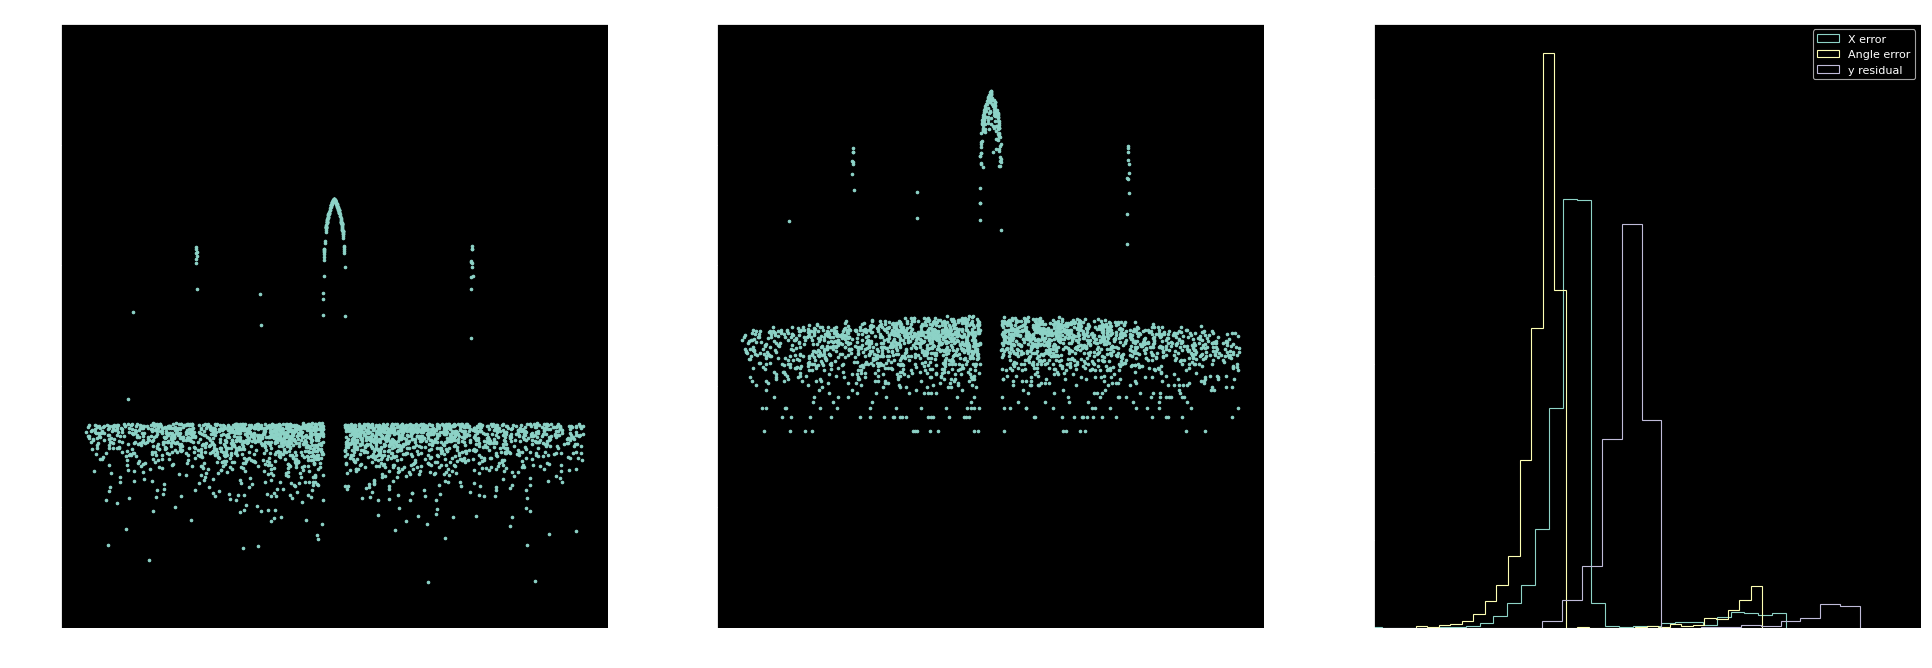

25 CORDIC iterations


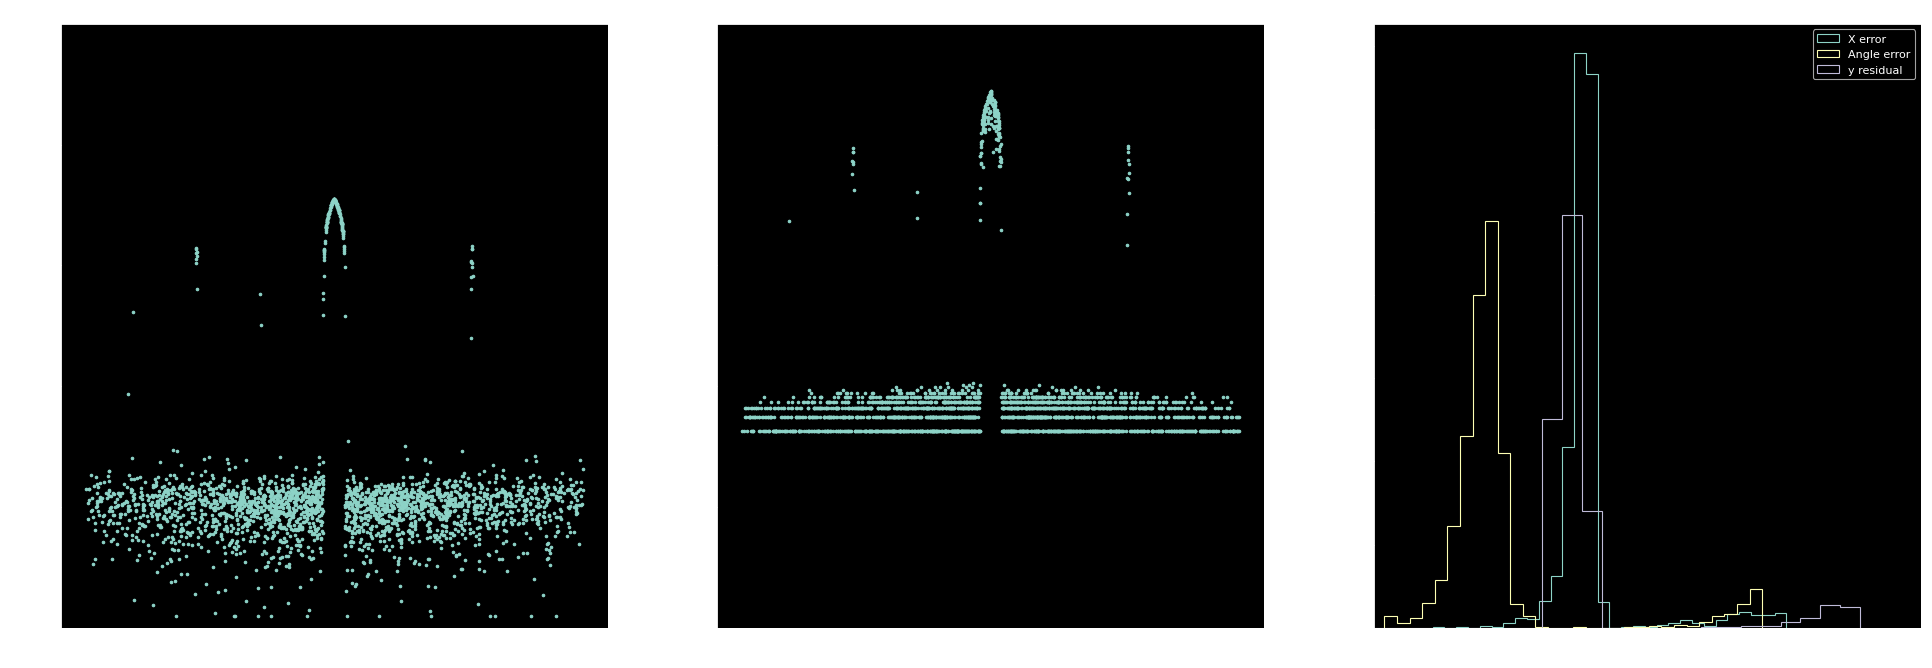

30 CORDIC iterations


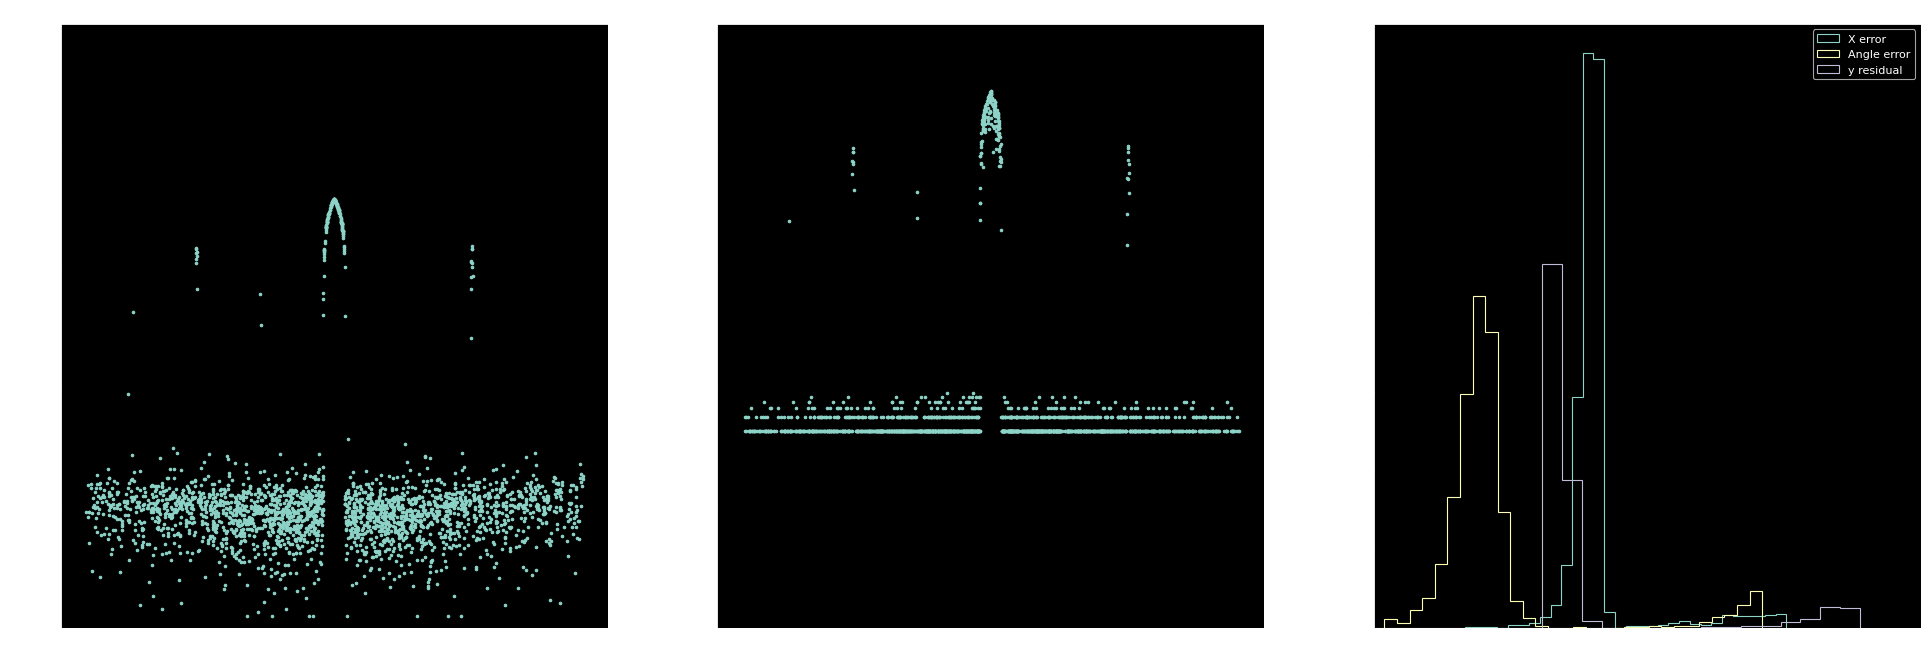

In [10]:
# Error for circular mode with different number of iterations
for i in (10, 15, 20, 25, 30):
    print("%d CORDIC iterations"%(i))
    vis_vect_error_file("data/hyp_vect/%d_nny_x2500.txt"%(i))